In [1]:
Problem 1

SyntaxError: invalid syntax (384267225.py, line 1)

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class NonlinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w2 = nn.Parameter(torch.randn(()))
        self.w1 = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))

    def forward(self, t_u):
        return self.w2 * t_u ** 2 + self.w1 * t_u + self.b

def train_loop(n_epochs, model, loss_fn, optimizer, t_u_train, t_c_train, t_u_val, t_c_val):
    for epoch in range(1, n_epochs + 1):
        model.train()
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        model.eval()
        with torch.no_grad():
            t_p_val = model(t_u_val)
            loss_val = loss_fn(t_p_val, t_c_val)
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_u = (t_u - t_u.mean()) / t_u.std()

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

loss_fn = nn.MSELoss()

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

for lr in learning_rates:
    model = NonlinearModel()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    print(f"Training with learning rate {lr}")
    train_loop(n_epochs, model, loss_fn, optimizer, t_u_train, t_c_train, t_u_val, t_c_val)


Training with learning rate 0.1
Epoch 500, Training loss 1.8996, Validation loss 4.0983
Epoch 1000, Training loss 1.8996, Validation loss 4.0983
Epoch 1500, Training loss 1.8996, Validation loss 4.0983
Epoch 2000, Training loss 1.8996, Validation loss 4.0983
Epoch 2500, Training loss 1.8996, Validation loss 4.0983
Epoch 3000, Training loss 1.8996, Validation loss 4.0983
Epoch 3500, Training loss 1.8996, Validation loss 4.0983
Epoch 4000, Training loss 1.8996, Validation loss 4.0983
Epoch 4500, Training loss 1.8996, Validation loss 4.0983
Epoch 5000, Training loss 1.8996, Validation loss 4.0983
Training with learning rate 0.01
Epoch 500, Training loss 1.9033, Validation loss 3.8041
Epoch 1000, Training loss 1.8996, Validation loss 4.0953
Epoch 1500, Training loss 1.8996, Validation loss 4.0981
Epoch 2000, Training loss 1.8996, Validation loss 4.0981
Epoch 2500, Training loss 1.8996, Validation loss 4.0981
Epoch 3000, Training loss 1.8996, Validation loss 4.0981
Epoch 3500, Training loss

In [ ]:
1c

Epoch 500, Training loss 29.9413, Validation loss 18.6555
Epoch 1000, Training loss 9.6736, Validation loss 2.4259
Epoch 1500, Training loss 4.6006, Validation loss 0.0584
Epoch 2000, Training loss 2.9293, Validation loss 0.5716
Epoch 2500, Training loss 2.3045, Validation loss 1.5213
Epoch 3000, Training loss 2.0604, Validation loss 2.3383
Epoch 3500, Training loss 1.9636, Validation loss 2.9350
Epoch 4000, Training loss 1.9251, Validation loss 3.3431
Epoch 4500, Training loss 1.9098, Validation loss 3.6132
Epoch 5000, Training loss 1.9036, Validation loss 3.7887
Epoch 500, Training loss 32.8848, Validation loss 10.9294
Epoch 1000, Training loss 7.0327, Validation loss 0.0779
Epoch 1500, Training loss 3.1250, Validation loss 2.7926
Epoch 2000, Training loss 2.5340, Validation loss 4.9081
Epoch 2500, Training loss 2.4446, Validation loss 5.8933
Epoch 3000, Training loss 2.4310, Validation loss 6.3017
Epoch 3500, Training loss 2.4290, Validation loss 6.4645
Epoch 4000, Training loss 2.4

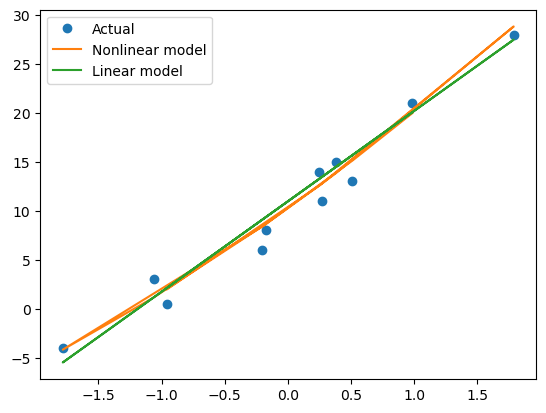

In [5]:
best_lr = 0.001
model = NonlinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=best_lr)
train_loop(n_epochs, model, loss_fn, optimizer, t_u_train, t_c_train, t_u_val, t_c_val)

with torch.no_grad():
    t_p_nonlinear = model(t_u)

linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=best_lr)
train_loop(n_epochs, linear_model, loss_fn, optimizer, t_u_train.unsqueeze(1), t_c_train.unsqueeze(1), t_u_val.unsqueeze(1), t_c_val.unsqueeze(1))

with torch.no_grad():
    t_p_linear = linear_model(t_u.unsqueeze(1))

plt.figure()
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Actual')
plt.plot(t_u.numpy(), t_p_nonlinear.numpy(), label='Nonlinear model')
plt.plot(t_u.numpy(), t_p_linear.numpy(), label='Linear model')
plt.legend()
plt.show()


In [ ]:
Problem 2

In [3]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
data = pd.read_csv('Housing.csv')

# Preprocess data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features].values
y = data['price'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(5, 1)

    def forward(self, x):
        return self.linear(x).squeeze()

def train_loop(n_epochs, model, loss_fn, optimizer, X_train, y_train, X_val, y_val):
    for epoch in range(1, n_epochs + 1):
        model.train()
        y_pred_train = model(X_train)
        loss_train = loss_fn(y_pred_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        model.eval()
        with torch.no_grad():
            y_pred_val = model(X_val)
            loss_val = loss_fn(y_pred_val, y_val)
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

for lr in learning_rates:
    model = LinearModel()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    print(f"Training with learning rate {lr}")
    train_loop(n_epochs, model, loss_fn, optimizer, X_train, y_train, X_val, y_val)


Training with learning rate 0.1
Epoch 500, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 1000, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 1500, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 2000, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 2500, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 3000, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 3500, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 4000, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 4500, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Epoch 5000, Training loss 1350008045568.0000, Validation loss 2292721647616.0000
Training with learning rate 0.01
Epoch 500, Training loss 1350008963072.0000, Validation loss 2292813135872.0000
Epoch 1000, Training loss 1350008176640.0000, 

In [ ]:
Problem 3

In [7]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('housing.csv')
data = pd.get_dummies(data, drop_first=True)
X = data.drop('price', axis=1).values
y = data['price'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

class LinearModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x).squeeze()

def train_loop(n_epochs, model, loss_fn, optimizer, X_train, y_train, X_val, y_val):
    for epoch in range(1, n_epochs + 1):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

input_dim = X_train_tensor.shape[1]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

for lr in learning_rates:
    model = LinearModel(input_dim)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    print(f"Training with learning rate {lr}")
    train_loop(n_epochs, model, loss_fn, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)


Training with learning rate 0.1
Epoch 500, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 1000, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 1500, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 2000, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 2500, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 3000, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 3500, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 4000, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 4500, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Epoch 5000, Training Loss: 968358297600.0000, Validation Loss: 1754319290368.0000
Training with learning rate 0.01
Epoch 500, Training Loss: 968365113344.0000, Validation Loss: 1753796444160.0000
Epoch 1000, Training Loss: 96835810